In [630]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower, TTestPower
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [631]:
df = pd.read_csv('data/kc_house_data.csv')

In [632]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [633]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<AxesSubplot:>

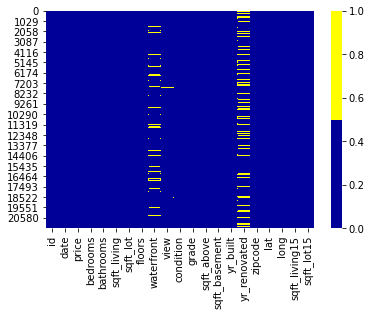

In [634]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [635]:

# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
date - 0.0%
price - 0.0%
bedrooms - 0.0%
bathrooms - 0.0%
sqft_living - 0.0%
sqft_lot - 0.0%
floors - 0.0%
waterfront - 11.0%
view - 0.0%
condition - 0.0%
grade - 0.0%
sqft_above - 0.0%
sqft_basement - 0.0%
yr_built - 0.0%
yr_renovated - 18.0%
zipcode - 0.0%
lat - 0.0%
long - 0.0%
sqft_living15 - 0.0%
sqft_lot15 - 0.0%


In [636]:
# Adding Binary Column for Basement
df['sqft_basement'].replace(to_replace='?', value='0', inplace=True)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'],errors='coerce')
df['has_basement'] = df['sqft_basement']
df.loc[df.has_basement > 0, 'has_basement'] = 1

In [637]:
# Converting to Datetime
df['date'] =  pd.to_datetime(df['date'], format='%m/%d/%Y')

In [638]:
# Converting Waterfront to Binary
df['waterfront'] = df['waterfront'].fillna('0')
df['waterfront'].replace(to_replace='NO', value='0', inplace=True)
df['waterfront'].replace(to_replace='YES', value='1', inplace=True)
df['waterfront'] = pd.to_numeric(df['waterfront'],errors='coerce')

In [639]:
df['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

In [640]:
# Converting Grade to Numeric
df['grade'] = df['grade'].str.slice(0,2).str.strip()
df['grade'] = pd.to_numeric(df['grade'],errors='coerce')

In [641]:
# Creating Column for Renovations within last 10 years
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)
df['renovated_less_10yrs'] = df['yr_renovated'] > 2010.0
df['renovated_less_10yrs'] = df['renovated_less_10yrs'].astype('int64')
df['renovated_less_10yrs'].value_counts()

0    21462
1      135
Name: renovated_less_10yrs, dtype: int64

In [642]:
# Converting condition to numeric
df['condition'].replace('Poor', '1', inplace=True)
df['condition'].replace('Fair', '2', inplace=True)
df['condition'].replace('Average', '3', inplace=True)
df['condition'].replace('Good', '4', inplace=True)
df['condition'].replace('Very Good', '5', inplace=True)
df['condition'] = df['condition'].astype(np.int64)

In [643]:
# Converting View to Numeric
df['view'].fillna('NONE', inplace=True)
df['view'].replace('NONE', '0', inplace=True)
df['view'].replace('FAIR', '1', inplace=True)
df['view'].replace('AVERAGE', '2', inplace=True)
df['view'].replace('GOOD', '3', inplace=True)
df['view'].replace('EXCELLENT', '4', inplace=True)
df['view'] = df['view'].astype(np.int64)

###DROPPING OUTLIERS

In [644]:
df.drop(df[df['price'] > 1400000.0].index, inplace = True)
df.drop(df[df['bedrooms'] > 15].index, inplace=True)
df.drop(df[df['yr_built'] <= 1930].index, inplace=True)
df.drop(df[df['sqft_lot'] > 87120].index, inplace=True)

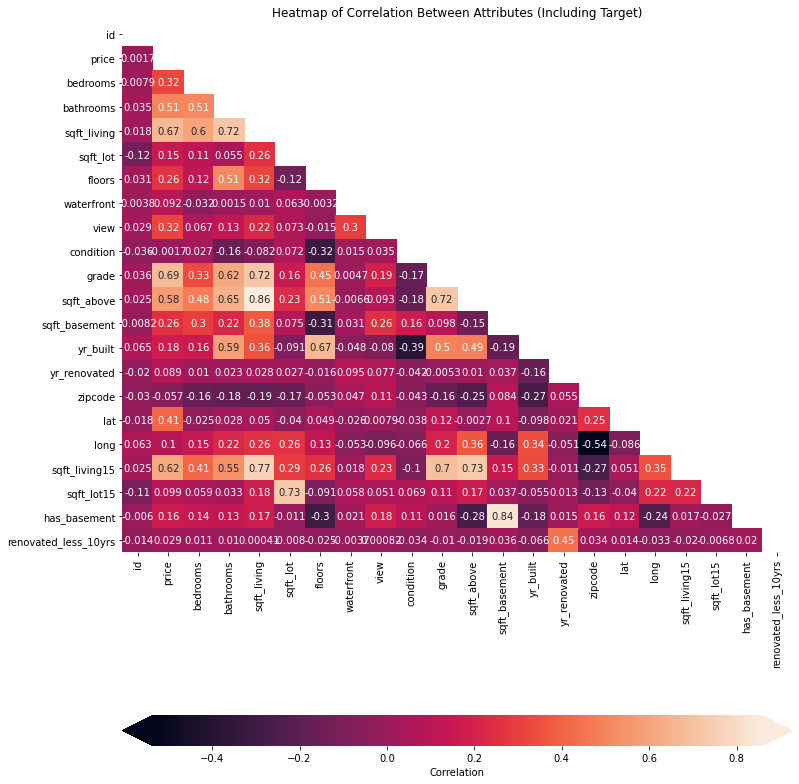

In [645]:
# Create a df with the target as the first column,
# then compute the correlation matrix
corr = df.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 15))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

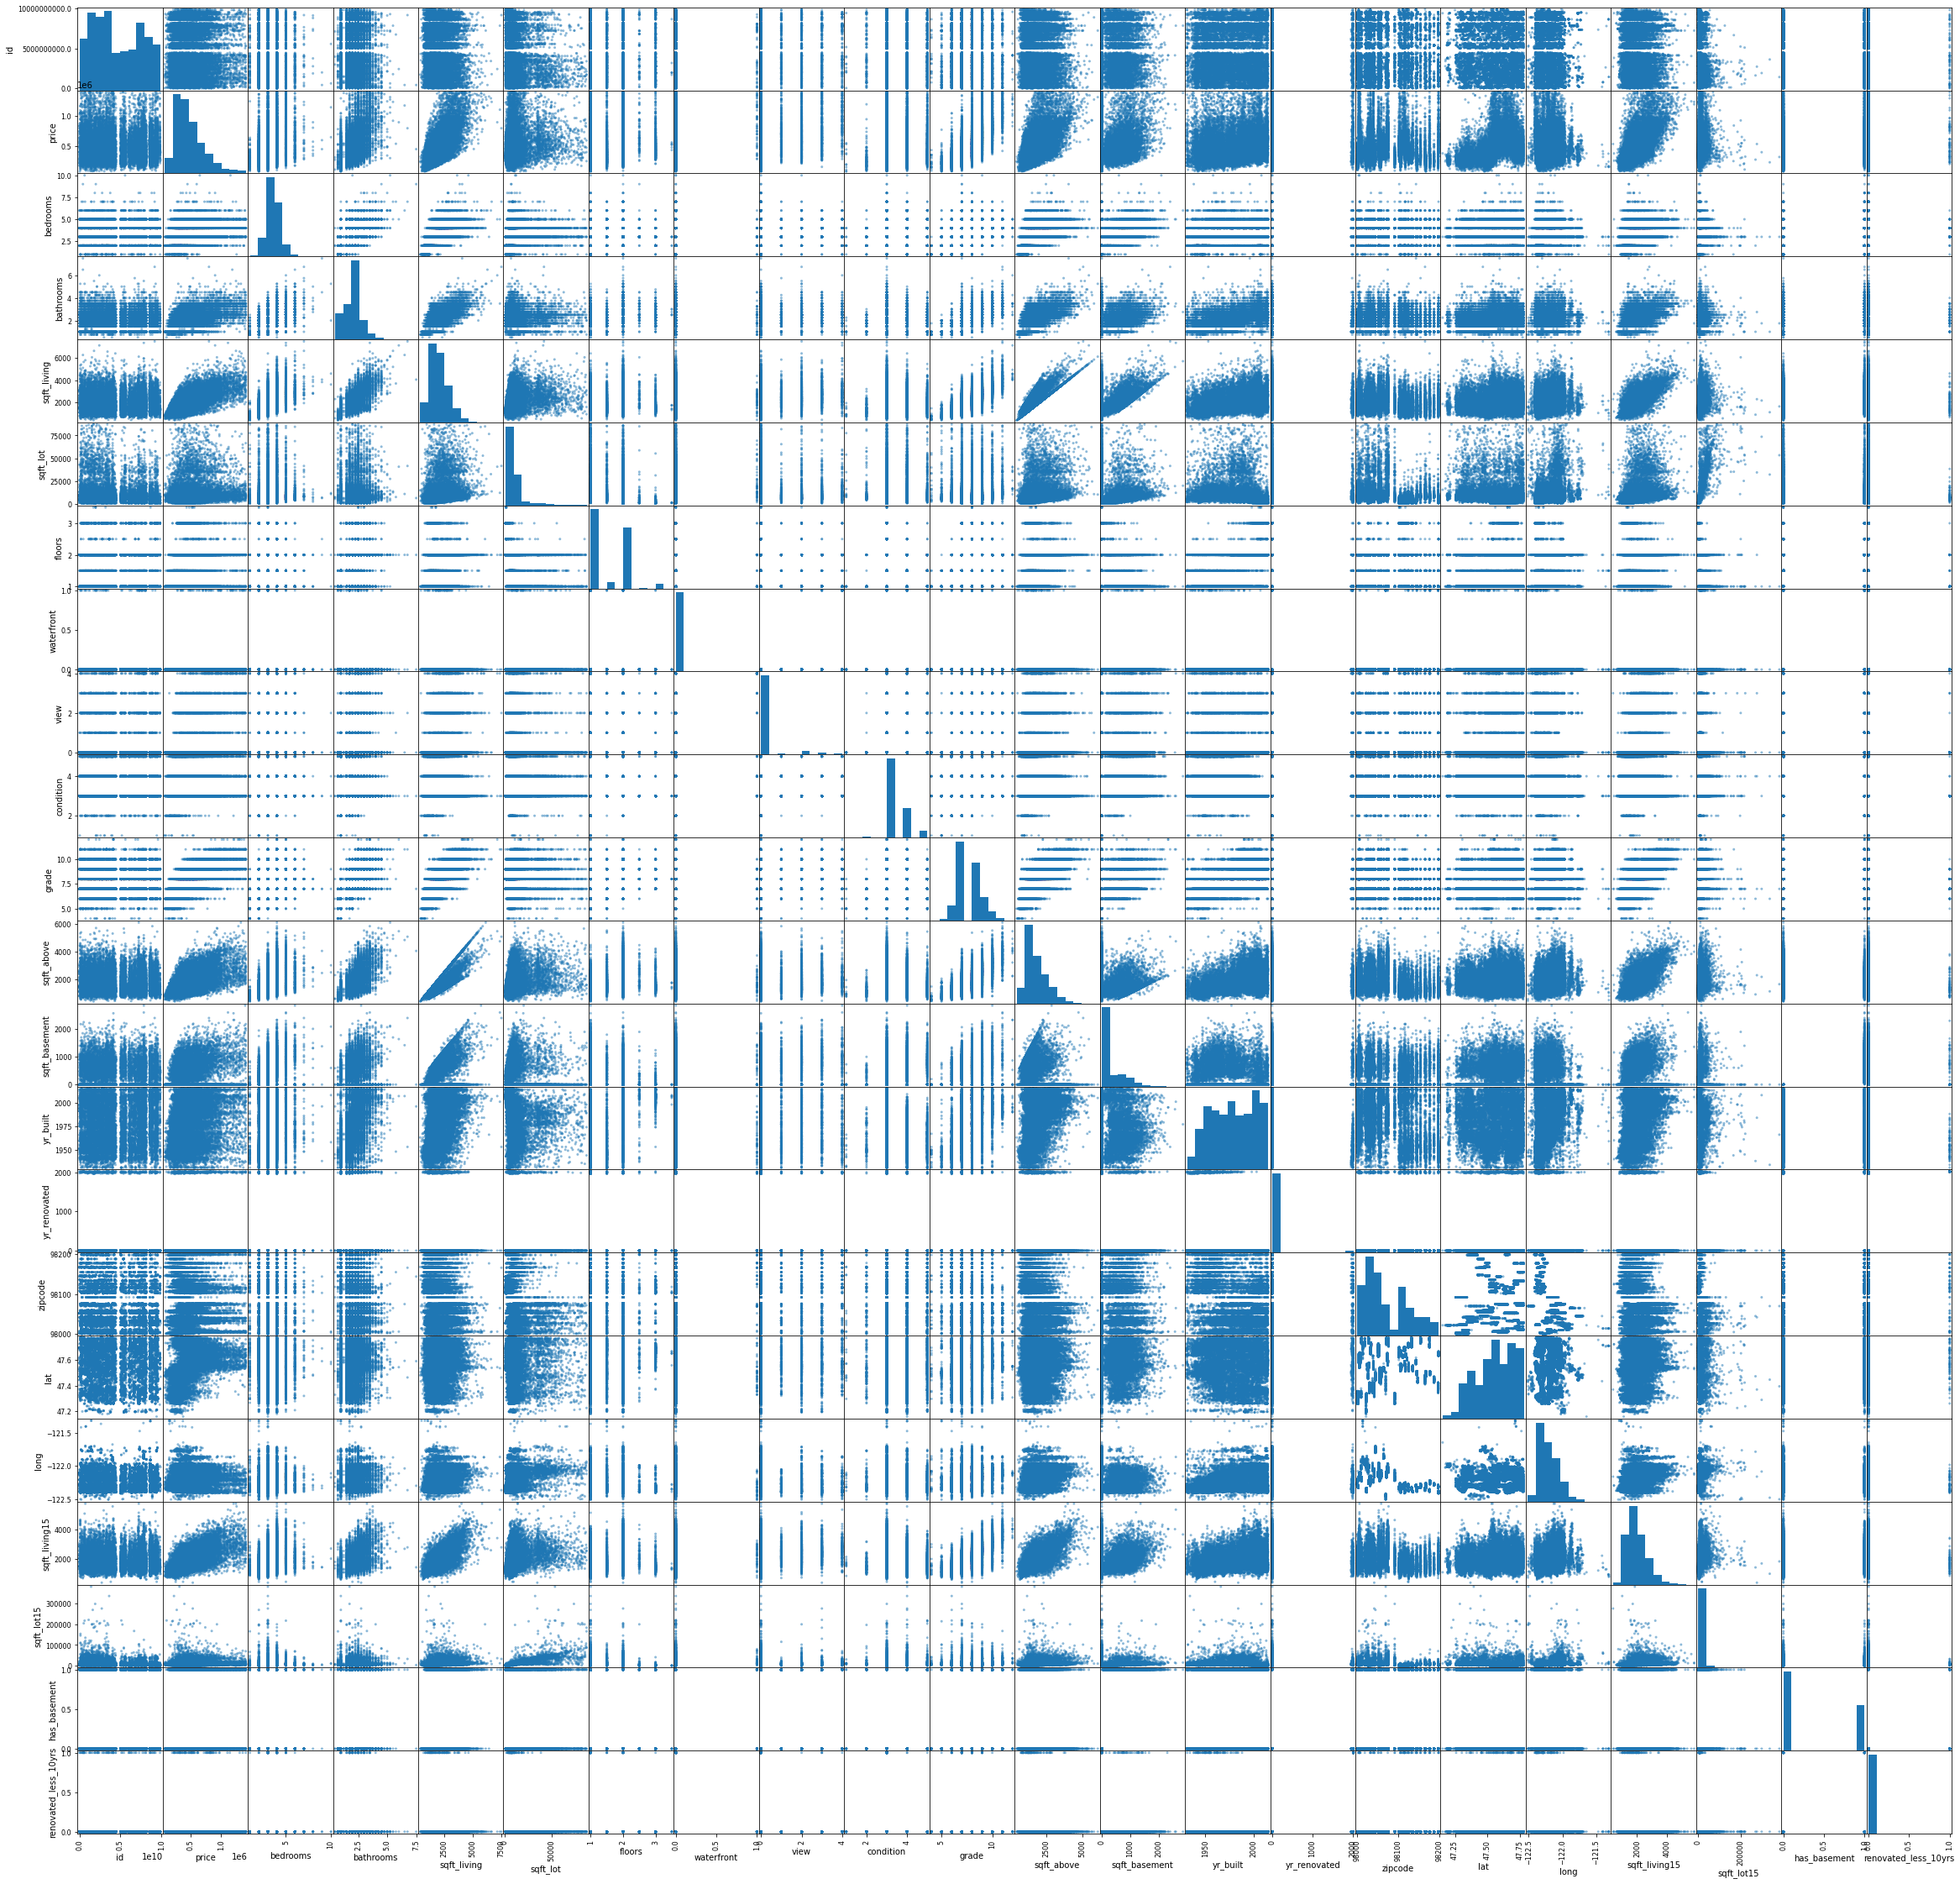

In [646]:
pd.plotting.scatter_matrix(df, figsize=[40, 40]);

In [647]:
df_corr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)


df_corr.rename(columns={0 : 'corr'}, inplace=True)
df_corr[(df_corr['corr'] > .6) & (df_corr['corr'] < 1) & df_corr['level_0'] == 'price']

,level_0,level_1,corr


In [648]:
other_cols = df.columns.drop(['price', 'date'])
formula = 'price ~ + {}'.format(' + '.join(other_cols))
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     2141.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        01:35:29   Log-Likelihood:            -2.3525e+05
No. Observations:               17867   AIC:                         4.705e+05
Df Residuals:                   17845   BIC:                         4.707e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -2.55e+06   2.01e+06     -1.267      0.205   -6.49e+06    1.39e+06
id                   -9.458e-07   3.36e-07     -2.819      0.005    -1.6e-06   -2.88e-07
bedrooms             -1.528e+04   1471.134    -10.386      0.000   -1.82e+04   -1.24e+04
bathrooms              2.06e+04   2408.356      8.553      0.000    1.59e+04    2.53e+04
sqft_living             92.7104     13.303      6.969      0.000      66.636     118.785
sqft_lot                -0.5425      0.137     -3.946      0.000      -0.812      -0.273
floors                2.161e+04   2735.510      7.900      0.000    1.62e+04     2.7e+04
waterfront            2.038e+05   1.81e+04     11.281      0.000    1.68e+05    2.39e+05
view                  4.357e+04   1616.667     26.948      0.000    4.04e+04    4.67e+04
condition             3.144e+04   1745.680     18.008      0.000     2.8e+04    3.49e+04
grade                 7.738e+04   1551.335     49.883      0.000    7.43e+04    8.04e+04
sqft_above               1.4875     13.237      0.112      0.911     -24.459      27.434
sqft_basement          -26.0569     13.761     -1.894      0.058     -53.030       0.916
yr_built             -1497.7526     76.235    -19.646      0.000   -1647.181   -1348.324
yr_renovated            34.4661      3.774      9.132      0.000      27.068      41.864
zipcode               -289.2034     21.958    -13.171      0.000    -332.244    -246.163
lat                   5.621e+05   7173.526     78.355      0.000    5.48e+05    5.76e+05
long                 -5.422e+04   9121.828     -5.944      0.000   -7.21e+04   -3.63e+04
sqft_living15           45.8395      2.567     17.857      0.000      40.808      50.871
sqft_lot15              -0.1383      0.106     -1.308      0.191      -0.346       0.069
has_basement           2.66e+04   3864.482      6.883      0.000     1.9e+04    3.42e+04
renovated_less_10yrs  2.733e+04   1.61e+04      1.697      0.090   -4245.362    5.89e+04
==============================================================================
Omnibus:                     3399.297   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10569.643
Skew:                           0.979   Prob(JB):                         0.00
Kurtosis:                       6.219   Cond. No.                     1.16e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

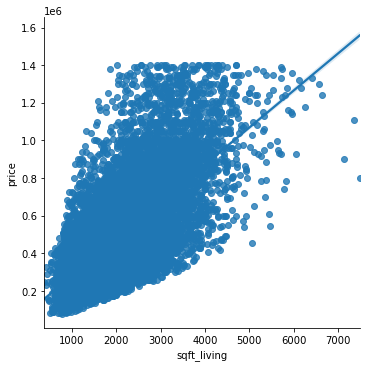

In [649]:

sns.lmplot(x='sqft_living', y='price', data=df)  

In [650]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


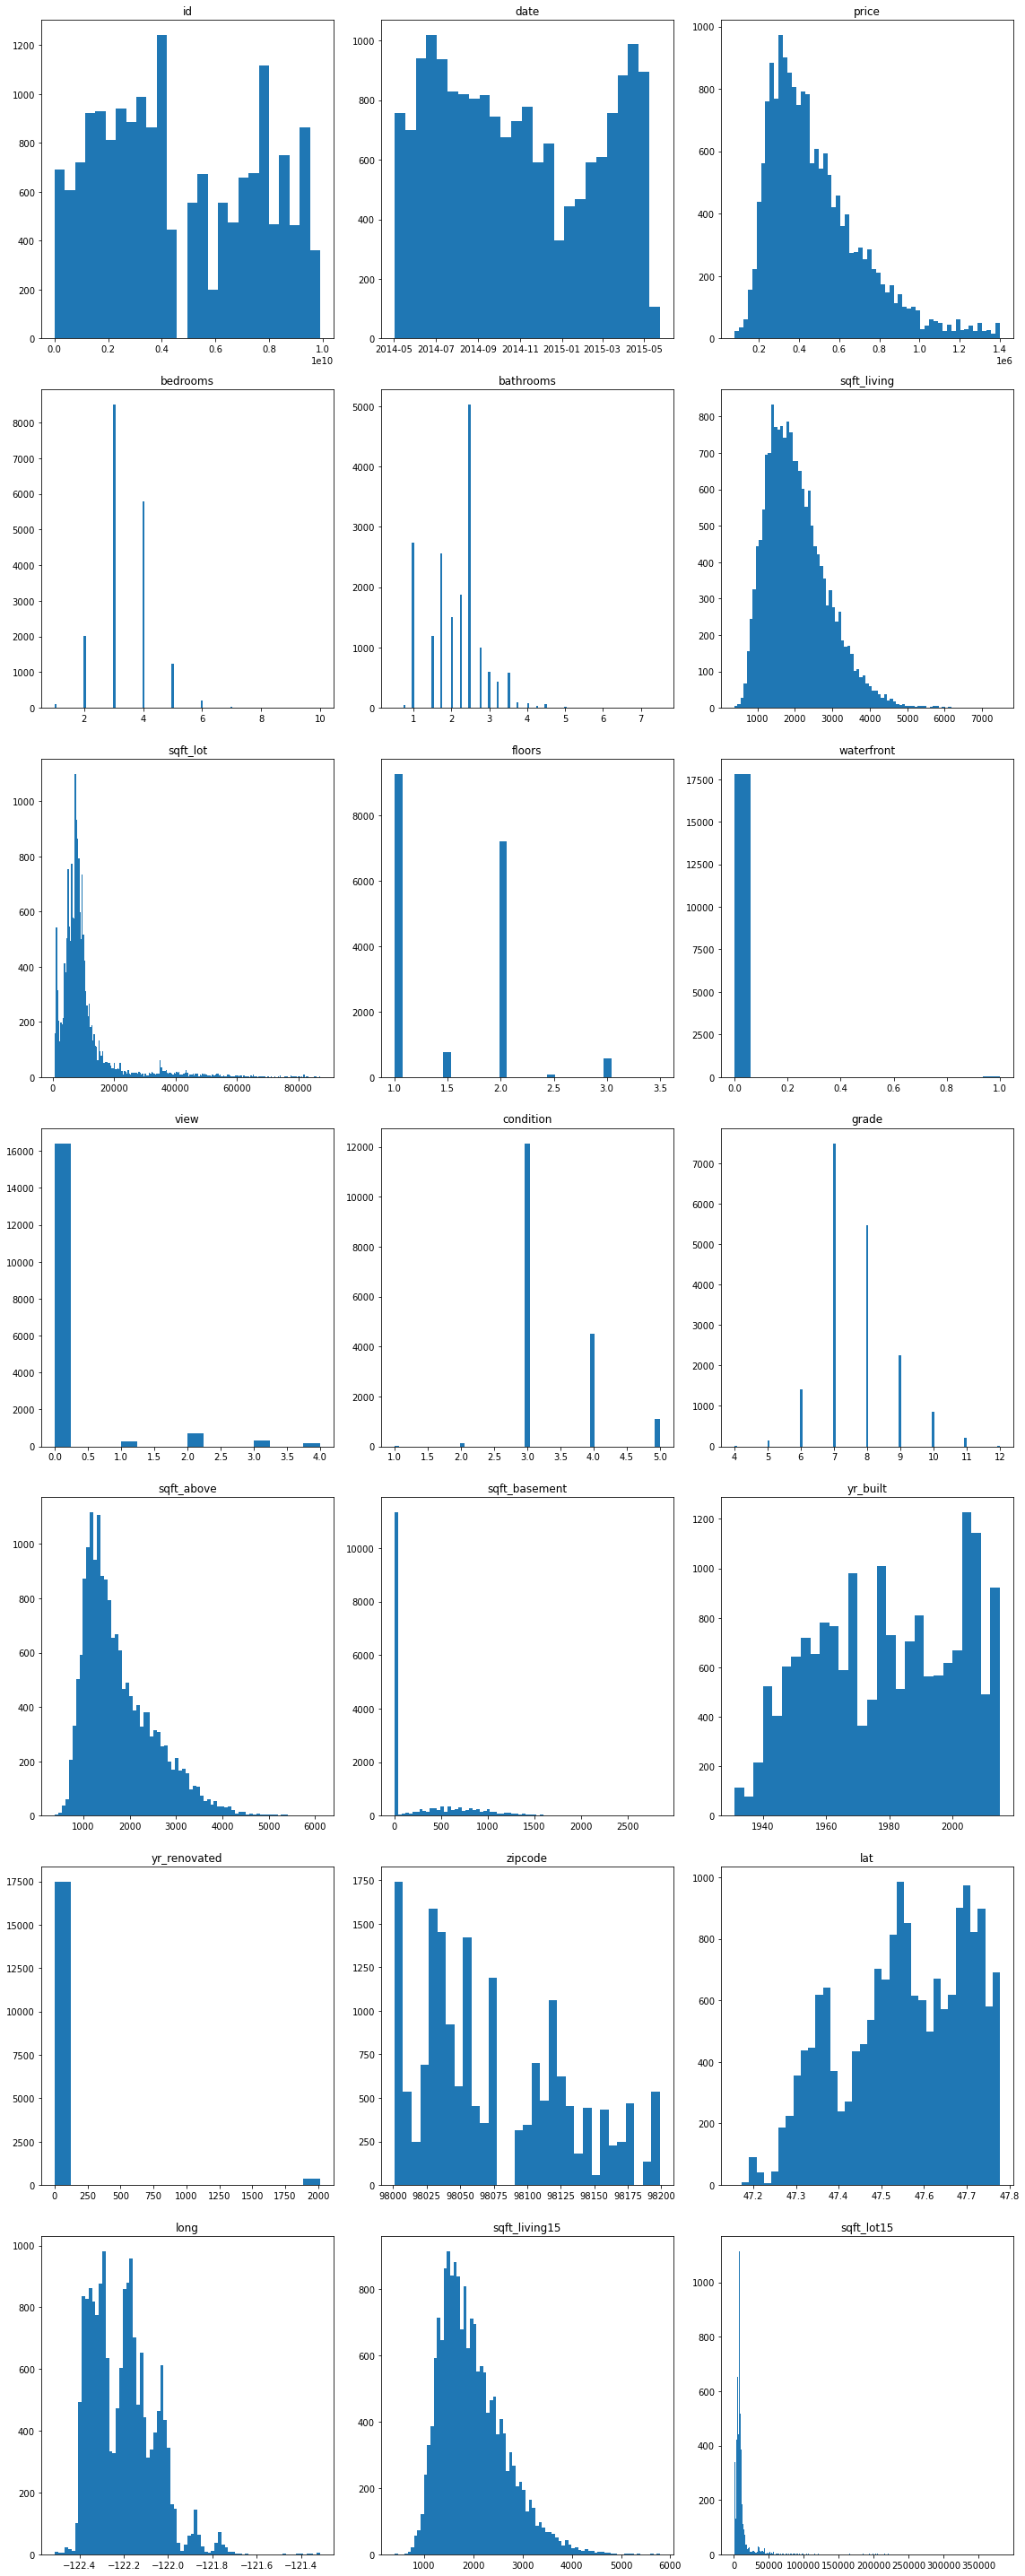

In [651]:
fig, axes = plt.subplots(nrows=(df.shape[1] // 3), ncols=3, figsize=(16,40))

columns = df.columns

for col, ax in zip(columns, axes.flatten()):
    ax.hist(df[col].dropna(), bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

C:\Users\chris\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='grade', ylabel='Density'>

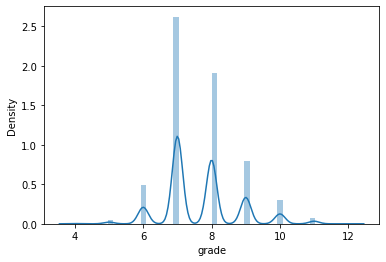

In [652]:
sns.distplot(a=df['grade'])

C:\Users\chris\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

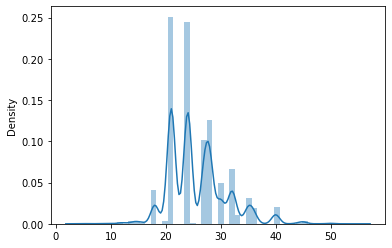

In [653]:
sns.distplot(a=(df['grade'] * df['condition']))

In [654]:
df['gradeXcondition'] = df['grade'] * df['condition']
df['bedroomsXbathrooms'] = df['bedrooms'] * df['bathrooms']
df['waterfrontXview'] = df['waterfront'] * df['view']
df['age'] = 2015 - df['yr_built']
df['gradeXview'] = df['grade'] * df['view']

In [655]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,has_basement,renovated_less_10yrs,gradeXcondition,bedroomsXbathrooms,waterfrontXview,age,gradeXview
id,1.000000,0.001747,0.007933,0.035299,0.018486,-0.118544,0.030809,0.003754,0.028520,-0.036119,...,0.063022,0.024783,-0.105144,-0.006033,-0.013661,-0.007333,0.019633,0.005422,-0.064998,0.028514
price,0.001747,1.000000,0.318764,0.506430,0.674128,0.154042,0.259237,0.092019,0.317640,-0.001750,...,0.099573,0.621449,0.098701,0.156941,0.029003,0.465646,0.483241,0.091575,-0.175064,0.342288
bedrooms,0.007933,0.318764,1.000000,0.508957,0.604860,0.106645,0.124368,-0.031783,0.067156,0.026567,...,0.148659,0.408589,0.058596,0.142710,0.011129,0.247122,0.814436,-0.030330,-0.155998,0.079397
bathrooms,0.035299,0.506430,0.508957,1.000000,0.718675,0.055210,0.509930,0.001533,0.130312,-0.159147,...,0.219761,0.545124,0.033128,0.129972,0.010269,0.278487,0.881438,0.001929,-0.585229,0.151837
sqft_living,0.018486,0.674128,0.604860,0.718675,1.000000,0.257841,0.316928,0.010087,0.223792,-0.082371,...,0.257737,0.765371,0.175151,0.168298,0.000406,0.415152,0.757909,0.010495,-0.356587,0.251999
sqft_lot,-0.118544,0.154042,0.106645,0.055210,0.257841,1.000000,-0.122095,0.062535,0.072966,0.071950,...,0.262786,0.290100,0.730333,-0.011183,-0.007977,0.173673,0.090169,0.057612,0.090758,0.074768
floors,0.030809,0.259237,0.124368,0.509930,0.316928,-0.122095,1.000000,-0.003232,-0.014858,-0.318201,...,0.131414,0.255558,-0.091404,-0.299235,-0.025482,0.016110,0.363819,-0.003438,-0.672831,-0.000870
waterfront,0.003754,0.092019,-0.031783,0.001533,0.010087,0.062535,-0.003232,1.000000,0.295737,0.014573,...,-0.053013,0.017819,0.058226,0.020703,-0.003680,0.016770,-0.012860,0.988227,0.047638,0.266746
view,0.028520,0.317640,0.067156,0.130312,0.223792,0.072966,-0.014858,0.295737,1.000000,0.035001,...,-0.096406,0.226623,0.050515,0.181035,0.000819,0.162962,0.123052,0.299599,0.079837,0.989346
condition,-0.036119,-0.001750,0.026567,-0.159147,-0.082371,0.071950,-0.318201,0.014573,0.035001,1.000000,...,-0.066014,-0.104104,0.068832,0.107647,-0.034313,0.742387,-0.091278,0.011946,0.385535,0.026886


In [656]:
other_cols = df.columns.drop(['price', 'date'])
formula = 'price ~ + {}'.format(' + '.join(other_cols))
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     1814.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        01:35:38   Log-Likelihood:            -2.3520e+05
No. Observations:               17867   AIC:                         4.704e+05
Df Residuals:                   17841   BIC:                         4.706e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.5309      0.979     -1.564      0.118      -3.449       0.388
id                   -8.954e-07   3.35e-07     -2.676      0.007   -1.55e-06    -2.4e-07
bedrooms             -3.415e+04   3035.251    -11.251      0.000   -4.01e+04   -2.82e+04
bathrooms            -1.168e+04   5111.420     -2.286      0.022   -2.17e+04   -1663.690
sqft_living             88.7656     13.271      6.689      0.000      62.753     114.779
sqft_lot                -0.5730      0.137     -4.173      0.000      -0.842      -0.304
floors                2.327e+04   2736.291      8.503      0.000    1.79e+04    2.86e+04
waterfront            2.617e+05   1.12e+05      2.345      0.019     4.3e+04    4.81e+05
view                   473.7559   1.04e+04      0.046      0.964   -1.99e+04    2.08e+04
condition            -4.805e+04   1.18e+04     -4.072      0.000   -7.12e+04   -2.49e+04
grade                 4.033e+04   5533.721      7.287      0.000    2.95e+04    5.12e+04
sqft_above               4.7651     13.210      0.361      0.718     -21.129      30.659
sqft_basement          -27.6536     13.725     -2.015      0.044     -54.556      -0.751
yr_built             -2244.7532    974.477     -2.304      0.021   -4154.822    -334.685
yr_renovated            35.1135      3.764      9.330      0.000      27.737      42.490
zipcode               -290.8052     21.953    -13.247      0.000    -333.834    -247.776
lat                   5.615e+05   7153.822     78.490      0.000    5.47e+05    5.76e+05
long                 -4.992e+04   9107.693     -5.481      0.000   -6.78e+04   -3.21e+04
sqft_living15           46.3113      2.563     18.066      0.000      41.287      51.336
sqft_lot15              -0.1128      0.106     -1.069      0.285      -0.320       0.094
has_basement          3.134e+04   3887.080      8.062      0.000    2.37e+04     3.9e+04
renovated_less_10yrs   2.84e+04   1.61e+04      1.768      0.077   -3085.146    5.99e+04
gradeXcondition       1.107e+04   1602.690      6.910      0.000    7932.721    1.42e+04
bedroomsXbathrooms    8748.7662   1235.450      7.081      0.000    6327.164    1.12e+04
waterfrontXview      -1.156e+04   2.95e+04     -0.392      0.695   -6.94e+04    4.63e+04
age                   -839.9845    999.141     -0.841      0.401   -2798.398    1118.429
gradeXview            5075.5944   1215.113      4.177      0.000    2693.855    7457.334
==============================================================================
Omnibus:                     3405.746   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11101.886
Skew:                           0.966   Prob(JB):                         0.00
Kurtosis:                       6.344   Cond. No.                     1.53e+19
==================

In [657]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [658]:
formula = 'price ~ + sqft_living + grade + condition + view + bedrooms + age'
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     4363.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        01:35:38   Log-Likelihood:            -2.3843e+05
No. Observations:               17867   AIC:                         4.769e+05
Df Residuals:                   17860   BIC:                         4.769e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.715e+05    1.4e+04    -48.084      0.000   -6.99e+05   -6.44e+05
sqft_living   113.9640      2.478     46.000      0.000     109.108     118.820
grade        1.106e+05   1689.223     65.446      0.000    1.07e+05    1.14e+05
condition    1.854e+04   2018.955      9.182      0.000    1.46e+04    2.25e+04
view         4.446e+04   1779.175     24.986      0.000     4.1e+04    4.79e+04
bedrooms    -1.772e+04   1698.652    -10.434      0.000   -2.11e+04   -1.44e+04
age          1839.1614     63.437     28.992      0.000    1714.819    1963.504
==============================================================================
Omnibus:                     1950.450   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4218.632
Skew:                           0.681   Prob(JB):                         0.00
Kurtosis:                       4.953   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [659]:
print(df['price'].var()); print(df['sqft_living'].var()); print(df['grade'].var()); print(df['condition'].var()); print(df['view'].var()); print(df['bedrooms'].var()); print(df['age'].var())

56317198255.90949
657601.8583120521
1.1438104632603485
0.37200517592359084
0.4478294604013757
0.7356876400398479
500.5871098846709


In [629]:

df[['price, sqft_living, grade, condition, view, bedrooms, age']] = StandardScaler().fit_transform(df[['price, sqft_living, grade, condition, view, bedrooms, age']])
print(df['price'].var()); print(df['sqft_living'].var()); print(df['grade'].var()); print(df['condition'].var()); print(df['view'].var()); print(df['bedrooms'].var()); print(df['age'].var())

KeyError: "None of [Index(['price, sqft_living, grade, condition, view, bedrooms, age'], dtype='object')] are in the [columns]"